In [1]:
# Import data science packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import machine learning packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

In [3]:
# Import data through preprocessing script
import preprocess_data
df = preprocess_data.klax()

In [4]:
sns.set_style('whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 20, 16

In [5]:
df.head(3)

,YEARMODA,TEMP,DEWP,VISIB,WDSP,PRCP,FRSHTT,month,FOG_VISIB,FOG
0,1973-01-01,58.6,12.9,10.0,8.7,0.0,clear,1,0,0
1,1973-01-02,54.7,27.3,10.0,5.6,0.0,clear,1,0,0
2,1973-01-03,53.3,42.4,10.0,7.1,0.0,rain,1,0,0


In [6]:
df['FOG'].value_counts()

0    12136
1     4251
Name: FOG, dtype: int64

In [7]:
df['FRSHTT'].value_counts()

clear       10009
fog          4251
rain         1169
fog+rain      958
Name: FRSHTT, dtype: int64

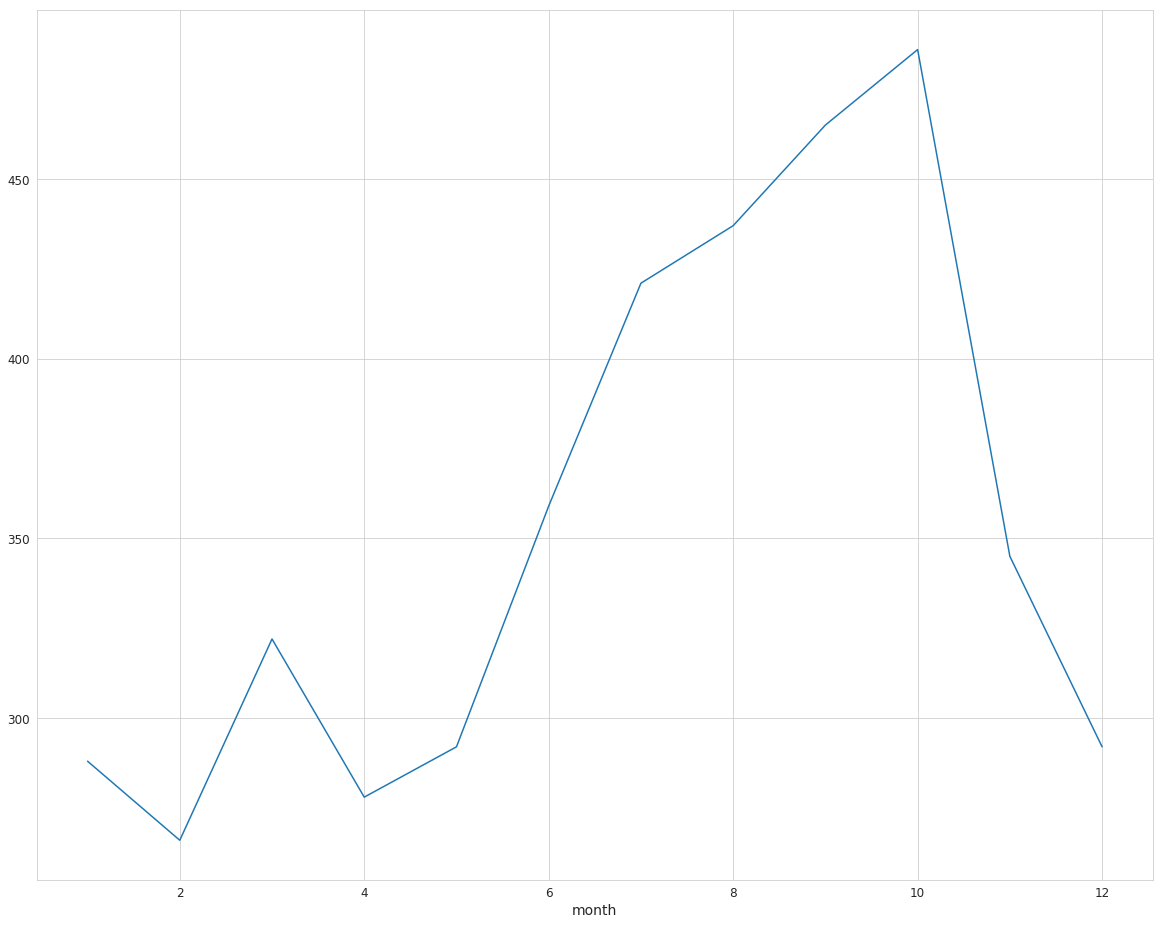

In [8]:
df.groupby('month')['FOG'].sum().plot()

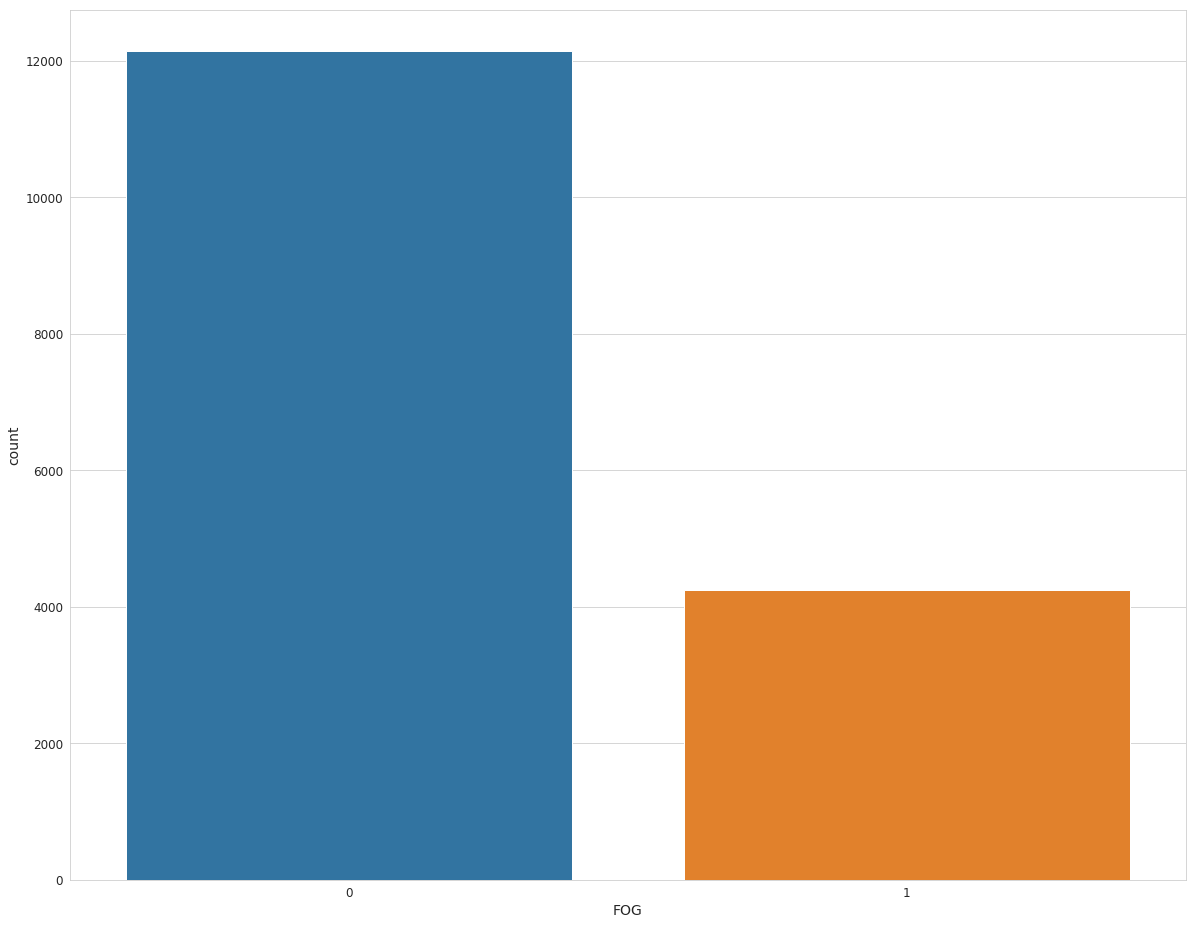

In [9]:
sns.countplot(df['FOG'])

In [33]:
df.head()

,YEARMODA,TEMP,DEWP,VISIB,WDSP,PRCP,FRSHTT,month,FOG_VISIB,FOG
0,1973-01-01,58.6,12.9,10.0,8.7,0.00,clear,1,0,0
1,1973-01-02,54.7,27.3,10.0,5.6,0.00,clear,1,0,0
2,1973-01-03,53.3,42.4,10.0,7.1,0.00,rain,1,0,0
3,1973-01-04,51.5,36.5,10.0,6.2,3.15,rain,1,0,0
4,1973-01-05,46.4,29.0,10.0,4.5,0.00,clear,1,0,0


# Modeling - Gaussian NB

In [12]:
"""
X = df[(df.month == 6) | (df.month == 7) | (df.month == 8)][features]
y = df[(df.month == 6) | (df.month == 7) | (df.month == 8)]['FOG']
"""

In [13]:
features = ['TEMP', 'DEWP', 'VISIB', 'WDSP', 'PRCP']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16387 entries, 0 to 16386
Data columns (total 10 columns):
YEARMODA     16387 non-null object
TEMP         16387 non-null float64
DEWP         16387 non-null float64
VISIB        16387 non-null float64
WDSP         16387 non-null float64
PRCP         16387 non-null float64
FRSHTT       16387 non-null object
month        16387 non-null int64
FOG_VISIB    16387 non-null int64
FOG          16387 non-null int64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.3+ MB


In [22]:
X = df[features]
y = df['FOG']

In [23]:
X = X.values.astype(np.float)
y = y.values.astype(np.float)

In [28]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred))
print('\n\n')
print(classification_report(y_test, y_pred))

[[3080  539]
 [ 387  911]]



              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      3619
         1.0       0.63      0.70      0.66      1298

   micro avg       0.81      0.81      0.81      4917
   macro avg       0.76      0.78      0.77      4917
weighted avg       0.82      0.81      0.81      4917



In [32]:
clf_pickle = GaussianNB()
clf_pickle.fit(X, y)
joblib.dump(clf_pickle, "klax_GaussianNB_model.pkl")

['klax_GaussianNB_model.pkl']